# Model Calibration

To test whether the model captures significant variance in cell division rates, we plot the range of division probabilties the model predicts for cells in our data. 

The calibration plot is constructed by: 
1. predicting the division rate for all cells
2. sorting the cells by the predicted probability
3. dividing the cells into consecutive buckets of a few thousand cells
4. plotting the average predicted probability in a bucket against the true probability computed as the fraction of cells actually dividing (i.e ki67 > threshold)

If there is no connection between neighborhood and division rate, we expect the model to predict the mean rate regardless of neighborhood. 
If on the other hand there is a connection, the model will predict high probabilities for some cells vs others. 

One limitation of this plot, is that a very expressive model will display a large range of probabilities even when there is no relation between neighborhood and division. We provide a function for comparing calibration over true and permuted divisions to compare fits. 

In [9]:
%load_ext autoreload
%autoreload 2


from tdm.plot.model.calibration import plot_calibration, plot_calibration_against_permuted_divisions

from tdm.raw.breast_mibi import read_single_cell_df
from tdm.analysis import Analysis
from tdm.cell_types import TUMOR, T_CELL, B_CELL, ENDOTHELIAL, FIBROBLAST, MACROPHAGE

all_types = [TUMOR, T_CELL, B_CELL, ENDOTHELIAL, MACROPHAGE, FIBROBLAST]

ana = Analysis(
    single_cell_df=read_single_cell_df(),
    cell_types_to_model=all_types,
    polynomial_dataset_kwargs={
        'degree': 2,
    },
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1/5 Constructing tissues [V]
2/5 Counting cell-neighbors [V]
3/5 Filtering cell-types [V]
4/5 Transforming features [V]
5/5 Fitting a model [V]


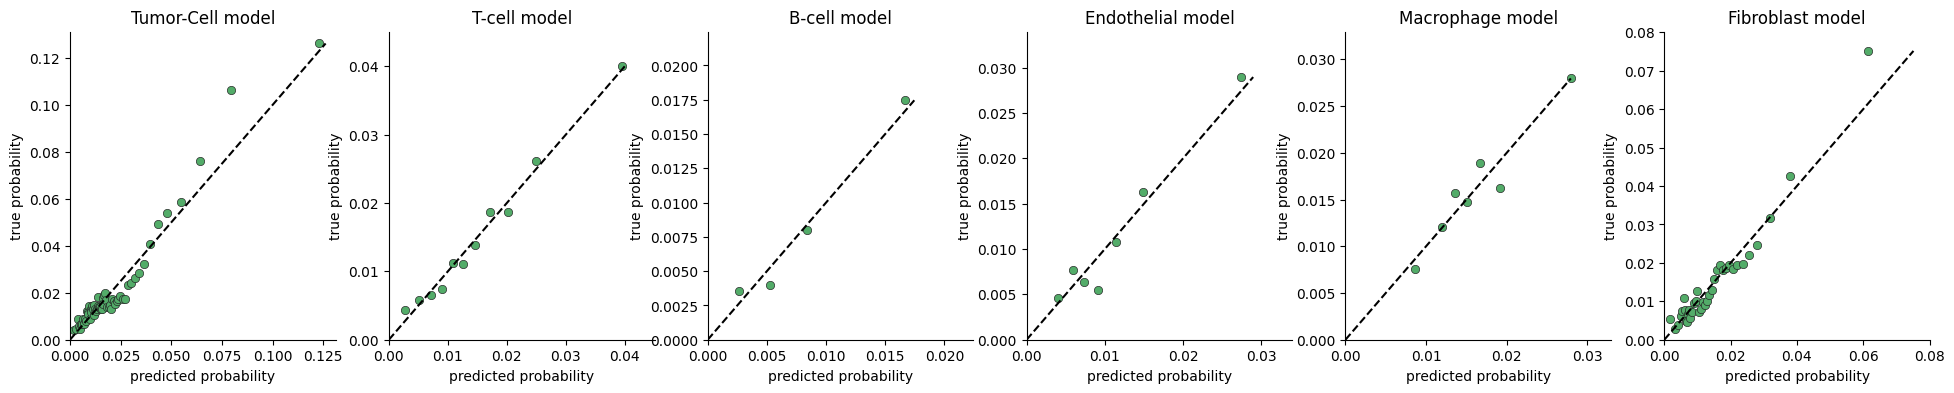

In [10]:
plot_calibration(ana, n_cells_per_bin=4000, max_p=None)

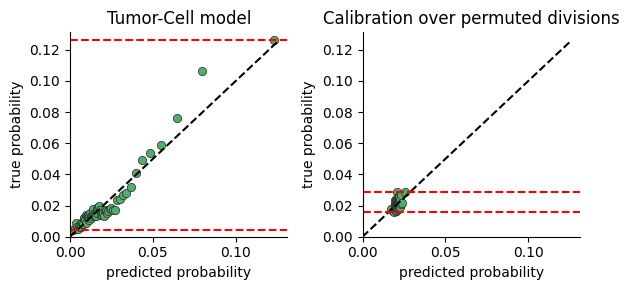

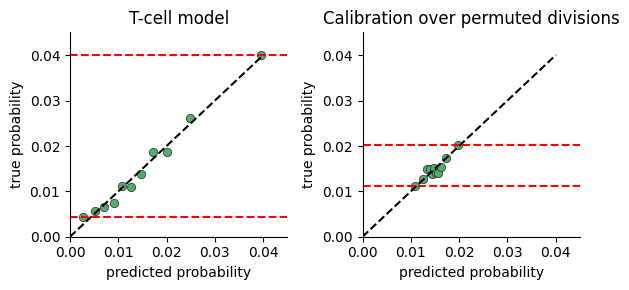

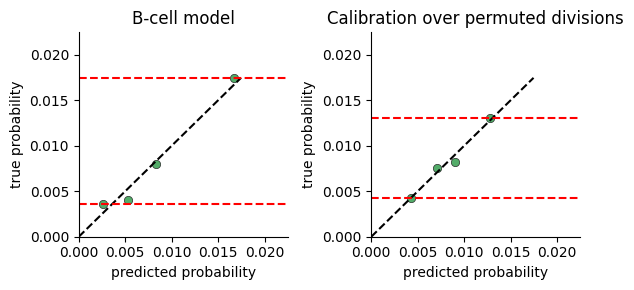

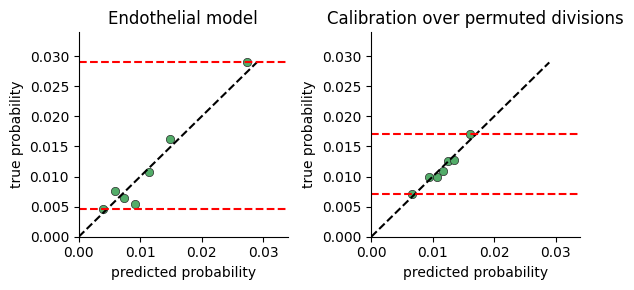

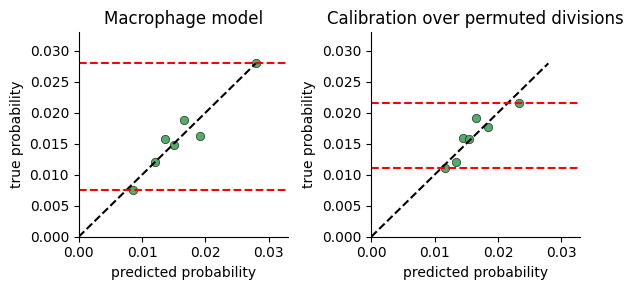

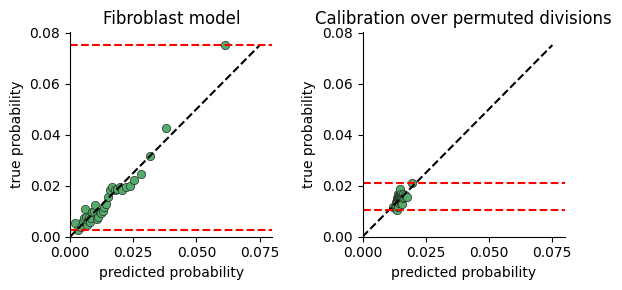

In [12]:
plot_calibration_against_permuted_divisions(ana, n_cells_per_bin=4000)